# Explore here

In [1]:
import os
from sqlalchemy import create_engine
import pandas as pd
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

# 1) Connect to the database here using the SQLAlchemy's create_engine function

# 2) Execute the SQL sentences to create your tables using the SQLAlchemy's execute function

# 3) Execute the SQL sentences to insert your data using the SQLAlchemy's execute function

# 4) Use pandas to print one of the tables as dataframes using read_sql function

True

In [2]:
! pip install spotipy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

con = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))

In [5]:
artist_id = "2uFUBdaVGtyMqckSeCl0Qj"

response = con.artist_top_tracks("2uFUBdaVGtyMqckSeCl0Qj")
if response:
    # We keep the "tracks" object of the answer
    tracks = response["tracks"]
    # We select, for each song, the data we are interested in and discard the rest
    tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]

In [6]:
import pandas as pd

tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

print(tracks_df.head(3))

   duration_ms           name  popularity
9     5.592367  Natural Light          58
7     4.648883            Fly          59
4     3.319433       The Tree          61


In [7]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


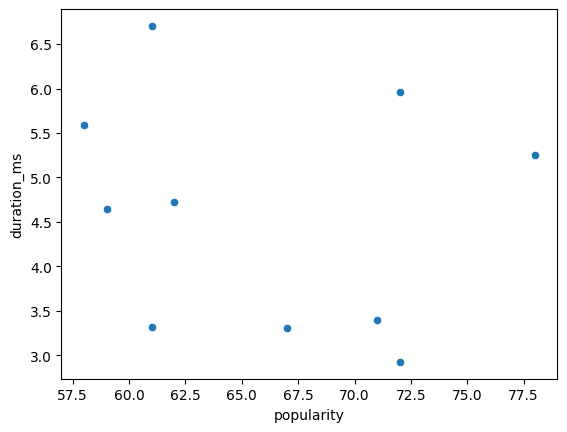

In [8]:
import seaborn as sns

scatter_plot = sns.scatterplot(data = tracks_df, x = "popularity", y = "duration_ms")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")